In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import xgboost

import sklearn.metrics as metrics

import seaborn as sns

import math as m

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings('ignore')

import random

from sklearn.cross_validation import KFold

%matplotlib inline

from sklearn.model_selection import GroupKFold

from pylab import rcParams

In [3]:
df = pd.read_csv('Kaggle_mercedes/train.csv')
df_t = pd.read_csv('Kaggle_mercedes/test.csv')

Lets explore the data first

In [4]:
df.shape

(4209, 378)

Looks like data the has quite a lot of variables

In [5]:
pd.options.display.max_columns = 500

In [6]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [7]:
#looking at the data types
df.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

8 categorical variables, others are continuos variables

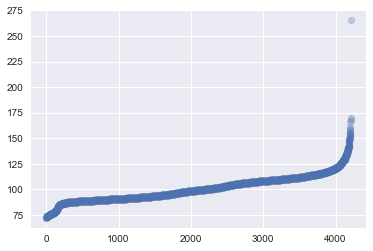

In [8]:
#lets check the target variable first
plt.scatter(range(len(df)), np.sort(df.y.values), alpha=0.3)

In [9]:
#removing outlier
ulim = 190
df.loc[df.y>ulim, 'y'] = ulim

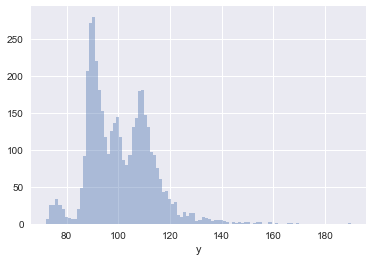

In [10]:
sns.distplot(df.y, bins=100, kde=False)

In [11]:
#checking the missing values
missing = df.isnull().sum()

missing[missing>0]

Series([], dtype: int64)

Looks like no missing values. One less thing to care about. :D

In [12]:
cols = df.columns.drop('y')

In [13]:
for col in cols:
    n_unique = df[col].unique()
    print(col, n_unique, len(n_unique))

ID [   0    6    7 ..., 8412 8415 8417] 4209
X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 47
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 27
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar'] 44
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g'] 7
X4 ['d' 'b' 'c' 'a'] 4
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae' 'ah'
 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 29
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b'] 12
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c'] 25
X10 [0 1] 2
X11 [0] 1
X12 [0 1] 2
X13 [1 0] 2
X14 [0 

Some also have just 1 unique values, We can drop those columns. Lets check

In [14]:
exc = ['X'+str(i) for i in range(9)]
exc.append('y')
col_detail = pd.DataFrame()
for col in cols:
    if col not in exc:
        col_detail = col_detail.append(pd.Series([col, len(df[col].unique())]), ignore_index=True)

In [15]:
col_detail.groupby(1).get_group(1)

,0,1
2,X11,1.0
82,X93,1.0
96,X107,1.0
218,X233,1.0
220,X235,1.0
253,X268,1.0
274,X289,1.0
275,X290,1.0
278,X293,1.0
282,X297,1.0


In [16]:
# Dropping these columns.
cols_to_drop = col_detail.groupby(1).get_group(1)[0].values

In [17]:
df.drop(cols_to_drop, 1, inplace=True)

In [18]:
df_t.drop(cols_to_drop, 1, inplace=True)

In [30]:
def label_enc(df_train, cols, except_=[]):
    le = LabelEncoder()
    for col in cols:
        if df_train[col].dtype=='O' and col not in except_:
            print(col)
            try:
                df_train[col] = le.fit_transform(df_train[col])
            except TypeError:
                df_train[col].fillna('NAN', inplace=True)
                df_train[col] = le.fit_transform(df_train[col])
    return df_train

In [20]:
df_t['y'] = None

In [21]:
trainid = df.ID.unique()

In [22]:
testid = df_t.ID.unique()

In [23]:
df_all = pd.concat([df, df_t])

In [24]:
df_all.sort_values('ID', inplace=True)

df_all.loc[df_all.ID.isin(trainid), 'is_test'] = 0

df_all.is_test.fillna(1, inplace=True)

In [25]:
#trick - intuition - previous y_value may have impact on next
def y_ffill(df_all, n):
    for i in range(1,n+1):
        df_all['y_prev_{0}'.format(i)] = None

        df_all['y_prev_{0}'.format(i)] = df_all.y.shift(i)

        df_all['y_prev_{0}'.format(i)].ffill(inplace=True)
    return df_all

In [26]:
df_all = y_ffill(df_all, 1)

In [73]:
df_all[['ID', 'y', 'y_prev_1']].head(10)

,ID,y,y_prev_1
0,0,130.81,NaN
0,1,None,130.81
1,2,None,130.81
2,3,None,130.81
3,4,None,130.81
4,5,None,130.81
1,6,88.53,130.81
2,7,76.26,88.53
5,8,None,76.26
3,9,80.62,76.26


In [232]:
import ak

In [31]:
df_all.columns

Index(['ID', 'X0', 'X1', 'X10', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105',
       ...
       'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'y', 'is_test',
       'y_prev_1'],
      dtype='object', length=368)

In [33]:
df_all = label_enc(df_all, df_all.columns, except_=['y', 'ID'])

X0
X1
X2
X3
X4
X5
X6
X8


In [36]:
df = df_all.loc[df_all.ID.isin(trainid)]

In [37]:
df_t = df_all.loc[df_all.ID.isin(testid)]

In [105]:
predictors = df.columns.drop(['ID', 'y', 'is_test'])

In [106]:
predictors

Index(['X0', 'X1', 'X10', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105',
       'X106',
       ...
       'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99',
       'y_prev_1'],
      dtype='object', length=365)

In [107]:
predictors

Index(['X0', 'X1', 'X10', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105',
       'X106',
       ...
       'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99',
       'y_prev_1'],
      dtype='object', length=365)

In [42]:
xgb = xgboost.XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.015, random_state=100, min_child_weight=1)

In [41]:
kf = KFold(len(df),n_folds=5 ,shuffle=True)

In [99]:
xgb = xgboost.XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.02, random_state=100, min_child_weight=1)

In [108]:
le = LabelEncoder()
all_score = []
c=0
for train_i, cv_i in kf:
    df_train = df.loc[train_i]
    df_cv = df.loc[cv_i]
#     c= c+1
    xgb.fit(df_train[predictors], df_train['y'])
    score = metrics.r2_score(df_cv['y'] ,xgb.predict(df_cv[predictors]))
    print(score)
    all_score.append(score)
print('Mean score =',np.array(all_score).mean())

# xgb.fit(df[predictors], df['y'])

0.595880800785
0.57431239771
0.618121776574
0.603826747735
0.53600176842
Mean score = 0.585628698245


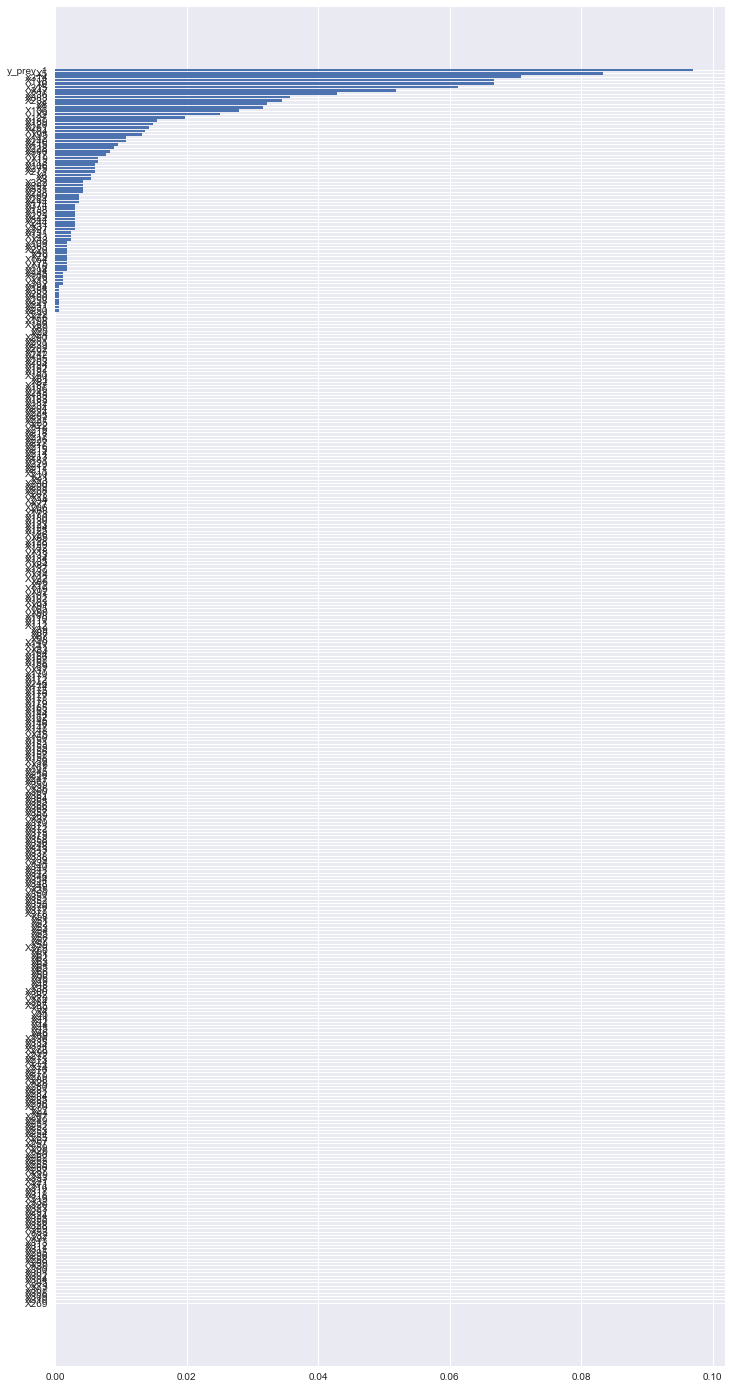

In [109]:
#checking feature importance
plt.figure(figsize=(12,25))
imp = pd.DataFrame({'Feature':predictors, 'Importance':xgb.feature_importances_}).sort_values('Importance')
plt.barh(range(len(predictors)), imp.Importance)
plt.yticks(range(len(predictors)), imp.Feature)
plt.show()

In [110]:
#using only top 35 features, this can be tuned or can be replaced by some feature reduction technique
pred_new = imp.sort_values('Importance', ascending=False)[:35].Feature.values

In [111]:
predictors = pred_new

In [112]:
predictors

array(['y_prev_1', 'X5', 'X314', 'X118', 'X0', 'X315', 'X47', 'X236',
       'X383', 'X232', 'X8', 'X1', 'X136', 'X2', 'X127', 'X189', 'X120',
       'X261', 'X104', 'X95', 'X142', 'X240', 'X115', 'X228', 'X306',
       'X117', 'X19', 'X113', 'X275', 'X271', 'X106', 'X6', 'X3', 'X322',
       'X292'], dtype=object)

In [113]:
#check the score again
le = LabelEncoder()
all_score = []
c=0
for train_i, cv_i in kf:
    df_train = df.loc[train_i]
    df_cv = df.loc[cv_i]
#     c= c+1
    xgb.fit(df_train[predictors], df_train['y'])
    score = metrics.r2_score(df_cv['y'] ,xgb.predict(df_cv[predictors]))
    print(score)
    all_score.append(score)
print('Mean score =',np.array(all_score).mean())

# xgb.fit(df[predictors], df['y'])

0.598452917369
0.578570061665
0.618700392714
0.603755806424
0.539296078403
Mean score = 0.587755051315


In [101]:
#training model on whole data
xgb.fit(df[predictors], df['y'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=100,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
       silent=True, subsample=1)

In [102]:
preds = xgb.predict(df_t[predictors])

In [103]:
df_t['y'] = preds

In [104]:
df_t[['ID', 'y']].to_csv('submission.csv', index=False)